In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('techgear_sales.xlsx')
print(df.head())

   purchase_amount  customer_age  promo_period purchase_category
0        16.257116            46             1       Accessories
1        16.864348            40             1       Accessories
2        17.356663            36             1       Accessories
3        17.598137            43             1       Accessories
4        17.677614            40             1       Accessories


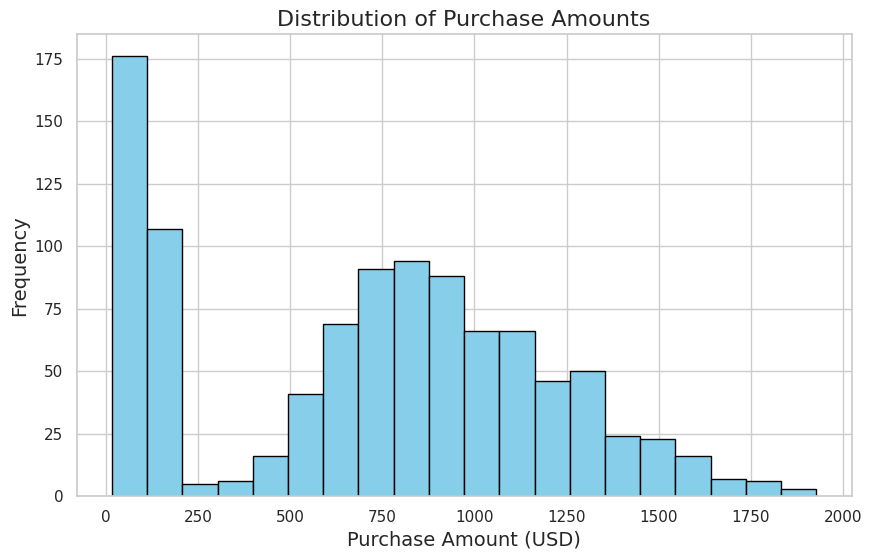

In [4]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram of purchase_amount
plt.figure(figsize=(10, 6))
plt.hist(df['purchase_amount'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Distribution of Purchase Amounts', fontsize=16)
plt.xlabel('Purchase Amount (USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

In [5]:
df.describe()

,purchase_amount,customer_age,promo_period
count,1000.000000,1000.000000,1000.000000
mean,713.061822,35.293000,0.313000
std,468.319453,9.378438,0.463946
min,16.257116,18.000000,0.000000
25%,151.316628,29.000000,0.000000
50%,770.891732,35.000000,0.000000
75%,1045.788433,42.000000,1.000000
max,1927.872475,66.000000,1.000000


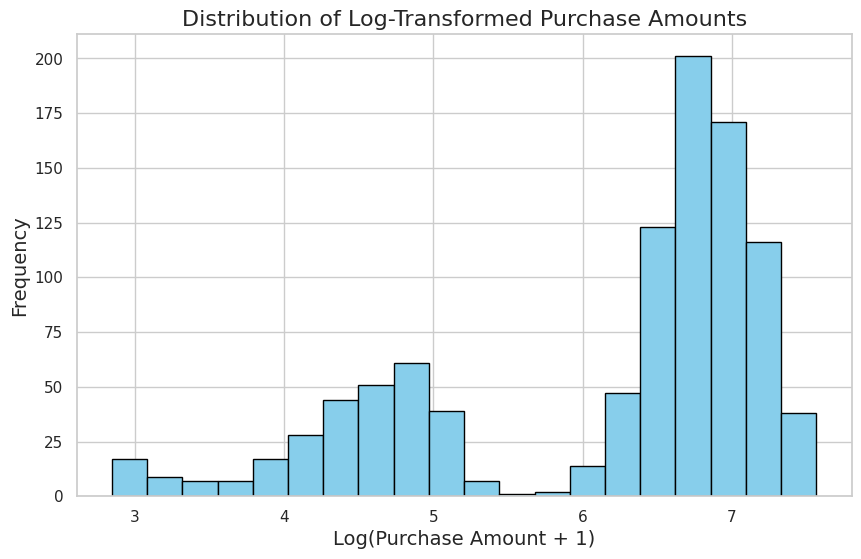

In [6]:
import numpy as np

# Apply log transformation
df['log_purchase_amount'] = np.log(df['purchase_amount'] + 1)  # Add 1 to avoid log(0)

# Create a histogram of log-transformed purchase amounts
plt.figure(figsize=(10, 6))
plt.hist(df['log_purchase_amount'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Log-Transformed Purchase Amounts', fontsize=16)
plt.xlabel('Log(Purchase Amount + 1)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [7]:
# Count the number of purchases made during a promotional period
promo_purchases = (df['promo_period'] == 1).sum()

# Count the total number of purchases
total_purchases = len(df)

# Calculate the probability
probability_promo = promo_purchases / total_purchases

# Display the result
print(f"Probability that a randomly selected purchase was made during a promotional period:\
 {probability_promo:.4f} (or {probability_promo * 100:.2f}%)")

Probability that a randomly selected purchase was made during a promotional period: 0.3130 (or 31.30%)


In [8]:
# Calculate average purchase amount during promotional vs. non-promotional periods
avg_purchase_promo = df[df['promo_period'] == 1]['purchase_amount'].mean()
avg_purchase_non_promo = df[df['promo_period'] == 0]['purchase_amount'].mean()

# Display the results
print(f"Average purchase amount during promotional periods: ${avg_purchase_promo:.2f}")
print(f"Average purchase amount during non-promotional periods: ${avg_purchase_non_promo:.2f}")

Average purchase amount during promotional periods: $716.83
Average purchase amount during non-promotional periods: $711.34


In [9]:
# Filter purchases made during a promotional period
promo_purchases = df[df['promo_period'] == 1]

# Count purchases exceeding $1000 during promotional periods
high_value_promo_purchases = promo_purchases[promo_purchases['purchase_amount'] > 1000]

# Calculate the conditional probability
conditional_probability = len(high_value_promo_purchases) / len(promo_purchases)

# Display the result
print(f"Conditional probability that a purchase amount exceeds $1000 given that it \
was made during a promotional period: {conditional_probability:.4f} (or \
{conditional_probability * 100:.2f}%)")

Conditional probability that a purchase amount exceeds $1000 given that it was made during a promotional period: 0.1981 (or 19.81%)


In [10]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test
stat, p_value = shapiro(df['purchase_amount'])

# Display the results
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results at a 5% significance level
alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: The data follows a normal distribution.")
else:
    print("Reject the null hypothesis: The data does not follow a normal distribution.")

Shapiro-Wilk Test Statistic: 0.9378
P-value: 0.0000
Reject the null hypothesis: The data does not follow a normal distribution.


In [11]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

# Create age groups
bins = [18, 25, 35, 45, np.inf]
labels = ['18-25', '26-35', '36-45', '46+']
df['age_group'] = pd.cut(df['customer_age'], bins=bins, labels=labels)

# Calculate mean purchase amount for each age group
mean_purchase_by_age = df.groupby('age_group')['purchase_amount'].mean()
print("Mean Purchase Amount by Age Group:")
print(mean_purchase_by_age)

# Conduct a one-way ANOVA test
age_groups = [df[df['age_group'] == group]['purchase_amount'] for group in labels]
f_statistic, p_value = f_oneway(*age_groups)

# Display the results
print(f"\nOne-Way ANOVA Results:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results at a 5% significance level
alpha = 0.05
if p_value > alpha:
    print("\nConclusion: There are no significant differences in purchase amounts across age groups.")
else:
    print("\nConclusion: There are significant differences in purchase amounts across age groups.")

Mean Purchase Amount by Age Group:
age_group
18-25    771.363320
26-35    726.627558
36-45    703.935997
46+      618.887435
Name: purchase_amount, dtype: float64

One-Way ANOVA Results:
F-statistic: 2.5785
P-value: 0.0524

Conclusion: There are no significant differences in purchase amounts across age groups.


<ipython-input-11-7e782fd3482b>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_purchase_by_age = df.groupby('age_group')['purchase_amount'].mean()


<ipython-input-12-63bddc44e53f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='purchase_amount', data=df, palette='Set2')


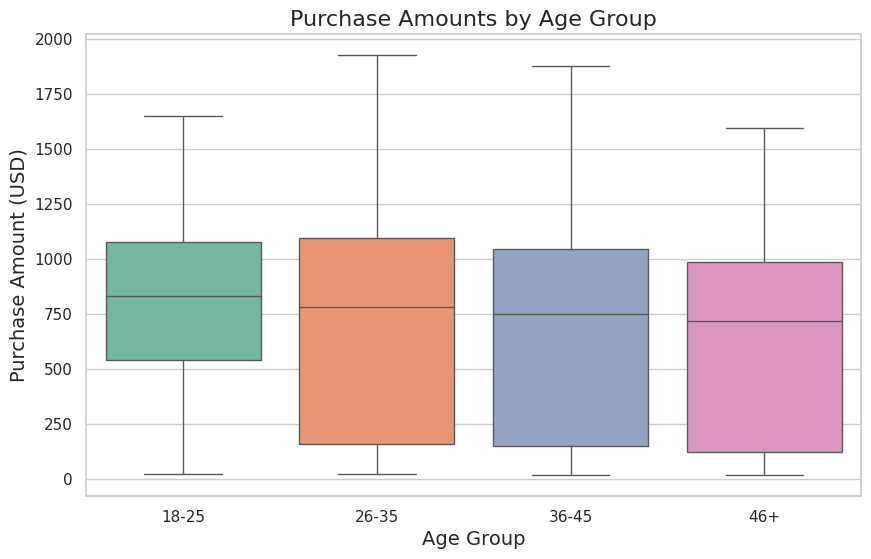

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot of purchase amounts by age group
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='purchase_amount', data=df, palette='Set2')
plt.title('Purchase Amounts by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Purchase Amount (USD)', fontsize=14)
plt.show()